In [ ]:
import pandas as pd
df=pd.read_csv('/content/filtered_thyroid_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
binary=['Gender','Hx Radiothreapy','Focality','Recurred']

In [ ]:
def bin (df,binary):
  for col in binary:
    df[col]=df[col].replace({'F':1,'M':0,'No':0,'Yes':1,'Uni-Focal':0,'Multi-Focal':1})
  return df

sure=bin (df,binary)

In [ ]:
sure=bin (df,binary)

<ipython-input-184-a2c1193026fd>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace({'F':1,'M':0,'No':0,'Yes':1,'Uni-Focal':0,'Multi-Focal':1})


In [ ]:
l2=['Age','Adenopathy', 'Pathology', 'T', 'N', 'M', 'Stage', 'Response','Risk']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in l2:
  l=LabelEncoder()
  df[col]=l.fit_transform(df[col])


In [ ]:
df.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,11,1,0,3,2,0,2,0,0,0,0,2,0
1,18,1,0,3,2,0,2,0,0,0,0,1,0
2,14,1,0,3,2,0,2,0,0,0,0,1,0
3,46,1,0,3,2,0,2,0,0,0,0,1,0
4,46,1,0,3,2,1,2,0,0,0,0,1,0


In [ ]:
import seaborn as sns

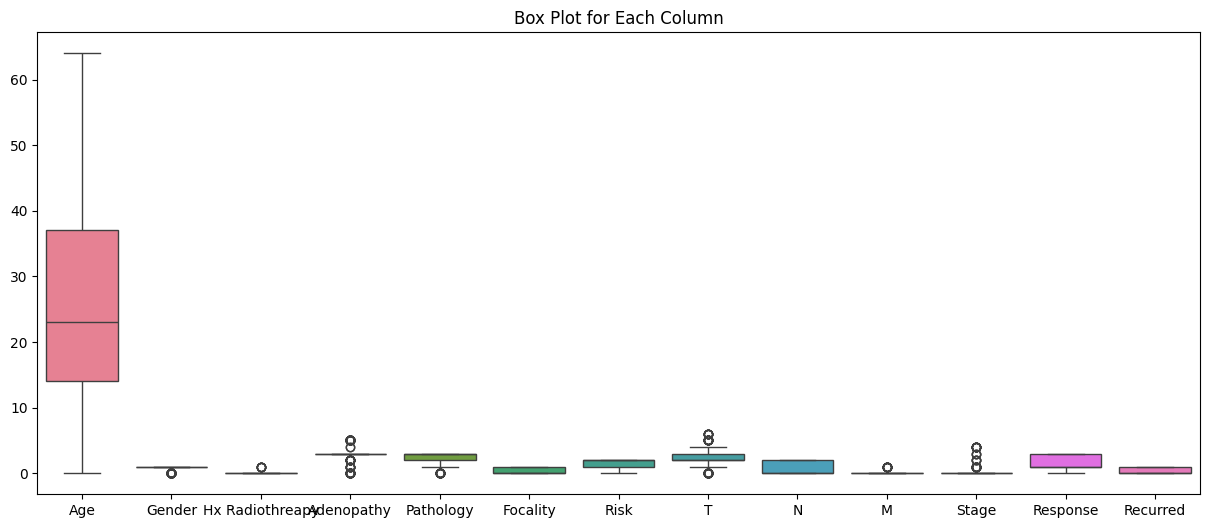

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم Box Plot لجميع الأعمدة في البيانات
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)  # تأكد من استخدام اسم DataFrame الصحيح هنا (df)
plt.title('Box Plot for Each Column')
plt.show()


In [ ]:
import numpy as np
df['Adenopathy']=np.log1p(df['Adenopathy'])
df['T']=np.log1p(df['T'])
df['Stage']=np.log1p(df['Stage'])

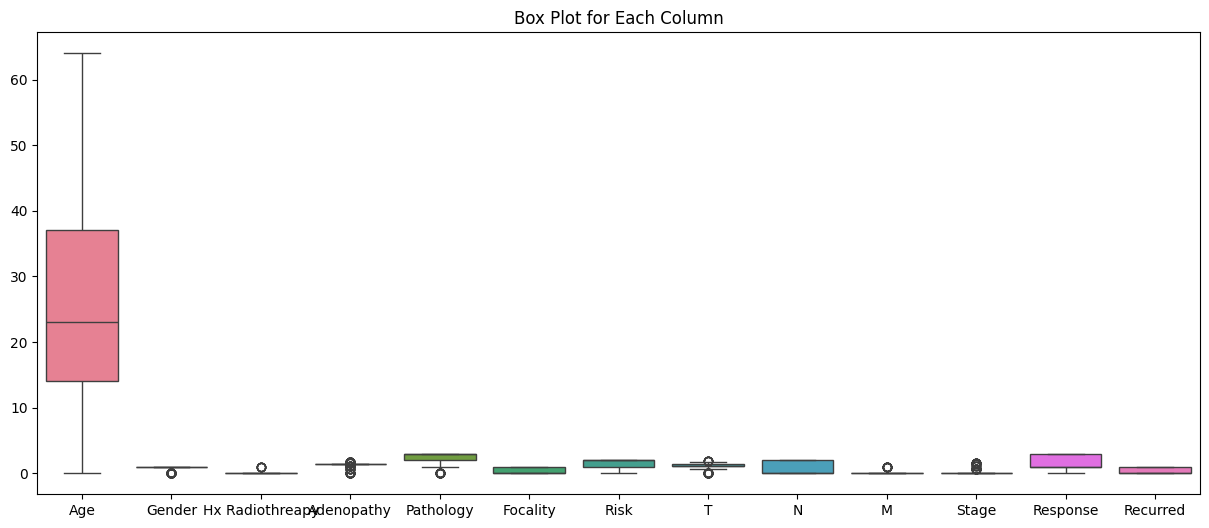

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم Box Plot لجميع الأعمدة في البيانات
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)  # تأكد من استخدام اسم DataFrame الصحيح هنا (df)
plt.title('Box Plot for Each Column')
plt.show()

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Hx Radiothreapy,0
Adenopathy,0
Pathology,0
Focality,0
Risk,0
T,0
N,0
M,0


In [ ]:
X=df.drop(columns='Recurred')
Y=df['Recurred']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
models = [LogisticRegression(max_iter=1000), RandomForestClassifier(n_estimators=200,max_depth=None,random_state=0),DecisionTreeClassifier(max_depth=None,random_state=0),GaussianNB()]

In [ ]:
def compare_models_train_test():

    for model in models:

        # training the model
        model.fit(x_train, y_train)

        # evaluating the model
        test_data_prediction = model.predict(x_test)

        accuracy = accuracy_score(y_test, test_data_prediction)

        print('Accuracy score of the ', model, ' = ', accuracy)

In [ ]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.8939393939393939
Accuracy score of the  RandomForestClassifier(n_estimators=200, random_state=0)  =  0.9696969696969697
Accuracy score of the  DecisionTreeClassifier(random_state=0)  =  0.9696969696969697
Accuracy score of the  GaussianNB()  =  0.7878787878787878
